# Testes de Permutação

Permuta significa mudar a ordem de um conjunto de valores.

## Passo a passo

### 1 - Combine os resultados dos diferentes grupos em um único conjunto de dados
### 2 - Embaralhe os dados combinados, então extraia aleatoriamente (sem reposição) uma reamostra de tamanho igual ao do grupo A
### 3 - Dos dados restantes, extraia aleatoriamente (sem reposição)
### 4 - Faça o mesmo para os grupos C,D e assim por diante
### 5 - Seja qual for a estatística ou estimativa calculada para as amostras originais calcule-a agora para as reamostragens e registre. Isso constitui uma iteração de permutação
### 6 - Repita os passos anteriores R vezes para produzir uma distribuição de permutação estatística de teste. 
### 7 - Compare o conjunto de diferença permutadas. (Se a direferença  observada estiver dentro do conjunto de diferenças permutadas, então não provamos nada). Se a diferença estiver fora da maior parte da distribuição de permutação, então concluímos que o acaso não é responsável. 

Diferença original de médias: -5.67
Valor p: 0.0196


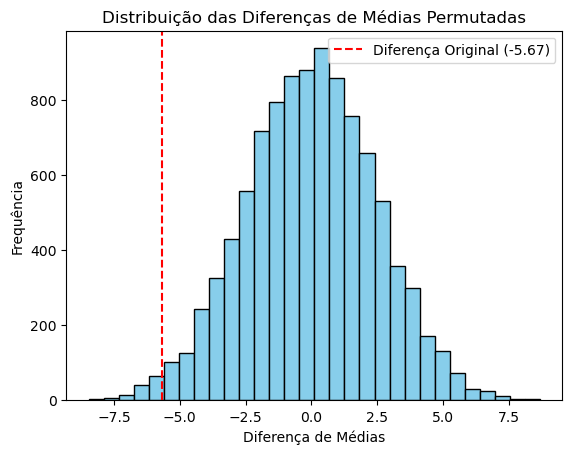

In [1]:
import numpy as np

# Dados dos dois grupos
np.random.seed(42)
grupo_a = np.random.normal(50, 10, 30)  # Grupo A: média 50, desvio padrão 10, n=30
grupo_b = np.random.normal(55, 10, 30)  # Grupo B: média 55, desvio padrão 10, n=30

# Diferença de médias original
dif_original = np.mean(grupo_a) - np.mean(grupo_b)

# Função para calcular a diferença de médias após permutação
def permutacao_teste(grupo_a, grupo_b, n_permut=10000):
    dif_permutadas = []
    combinados = np.concatenate([grupo_a, grupo_b])
    
    for _ in range(n_permut):
        np.random.shuffle(combinados)
        nova_a = combinados[:len(grupo_a)]
        nova_b = combinados[len(grupo_a):]
        dif_permutadas.append(np.mean(nova_a) - np.mean(nova_b))
    
    return np.array(dif_permutadas)

# Executando o teste de permutação
n_permut = 10000
dif_permutadas = permutacao_teste(grupo_a, grupo_b, n_permut)

# Calculando o valor p (proporção de permutações que resultam em uma diferença tão extrema quanto a observada)
p_valor = np.mean(np.abs(dif_permutadas) >= np.abs(dif_original))

# Resultados
print(f'Diferença original de médias: {dif_original:.2f}')
print(f'Valor p: {p_valor:.4f}')

# Plotando a distribuição das diferenças permutadas
import matplotlib.pyplot as plt

plt.hist(dif_permutadas, bins=30, color='skyblue', edgecolor='black')
plt.axvline(dif_original, color='red', linestyle='--', label=f'Diferença Original ({dif_original:.2f})')
plt.title('Distribuição das Diferenças de Médias Permutadas')
plt.xlabel('Diferença de Médias')
plt.ylabel('Frequência')
plt.legend()
plt.show()


In [2]:
# Isso significa que há uma diferença significativa entre as médias dos dois grupos, já que o valor p é muito pequeno, indicando que a diferença observada é rara sob a hipótese nula (ou seja, se não houvesse diferença real entre os grupos).